# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2

In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2


# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
import os
warnings.filterwarnings("ignore")

os.chdir('Datasets_and_Dictionary_NYC/trip_records/')
df = pd.read_parquet('2023-1.parquet')
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF


This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files


# Select the folder having data files
#os.chdir('Datasets_and_Dictionary_NYC/trip_records/')


# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
       
        # Reading the current file
        currentfile = pd.read_parquet(file_path)
   
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        sampled_data = pd.DataFrame()
        # After completing iteration through each date, we will append this data to the final dataframe.
     
        
        # Convert the DateTime column to pandas datetime type
        currentfile['tpep_pickup_datetime'] = pd.to_datetime(currentfile['tpep_pickup_datetime'])
        
        # Extract the date and hour from the DateTime column
        currentfile['Date'] = currentfile['tpep_pickup_datetime'].dt.date
        currentfile['Hour'] = currentfile['tpep_pickup_datetime'].dt.hour
       
        # Loop through dates and then loop through every hour of each date
        for date, date_group in currentfile.groupby('Date'):
           
            # Iterate through each hour of the selected date
            for hour, hour_group in date_group.groupby('Hour'):
                # Sample 5% of the hourly data randomly
                 sample = hour_group.sample(frac = 0.05, random_state = 42)
                
                # add data of this hour to the dataframe
                 sampled_data=pd.concat([sampled_data,sample])
                               
        # Concatenate the sampled data of all the dates to a single dataframe
        df=pd.concat([df,sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
    
#df.drop(columns=['Date', 'Hour'])

Error reading file .ipynb_checkpoints: 'tpep_pickup_datetime'
Error reading file NYC_Taxi_Sample.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
df.to_csv('NYC_Taxi_Sample.csv')


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file

newdf= pd.read_csv('NYC_Taxi_Sample.csv')


In [10]:
newdf.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0          80         2  2022-12-31 23:51:30   2022-12-31 23:56:06   
1         428         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
2        1113         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
3         819         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
4        3192         2  2023-01-01 00:24:30   2023-01-01 00:29:55   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           0.86         1.0                  N   
1              1.0           7.74         1.0                  N   
2              2.0           1.24         1.0                  N   
3              3.0           1.44         1.0                  N   
4              1.0           0.54         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           141           140  ...      0.5        2.00           0.0   
1           138           256  ...      0.5        0.00           0.0   
2           161           237  ...      0.5        2.58           0.0   
3           237           141  ...      0.5        0.00           0.0   
4           143           142  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         13.50                   2.5         0.00   
1                    1.0         41.15                   0.0         1.25   
2                    1.0         15.48                   2.5         0.00   
3                    1.0         16.40                   2.5         0.00   
4                    1.0         11.50                   2.5         0.00   

         Date  Hour  Airport_fee  
0  2022-12-31    23          NaN  
1  2023-01-01     0          NaN  
2  2023-01-01     0          NaN  
3  2023-01-01     0          NaN  
4  2023-01-01     0          NaN  

[5 rows x 23 columns]

In [11]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  Date                   object 
 21  Hour                   int64  
 22  Airport_fee       

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed

newdf.drop(columns=['Unnamed: 0','store_and_fwd_flag'], axis=1, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns

newdf['airport_fee']=newdf['airport_fee'].fillna(0)+newdf['Airport_fee'].fillna(0)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative

(newdf['fare_amount'].astype(int) < 0).sum()


0

Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts

newdf[['RatecodeID','fare_amount']]
len(newdf[newdf['RatecodeID'] < 0])

0

In [16]:
# Find which columns have negative values
negativeColumns=[]
for column in newdf.columns.tolist():
    if ((newdf[column].dtype == 'int64') or (newdf[column].dtype == 'float64') and (newdf[column] < 0).any()):
            negativeColumns.append(column)
negativeColumns


['VendorID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Hour',
 'Airport_fee']

In [17]:
# fix these negative values
for column in negativeColumns:
    newdf[column] = newdf[column].apply(lambda x: 0 if x < 0 else x)
newdf.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.86         1.0           141           140             1   
1           7.74         1.0           138           256             2   
2           1.24         1.0           161           237             1   
3           1.44         1.0           237           141             2   
4           0.54         1.0           143           142             2   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0          6.5  ...      0.5        2.00           0.0                    1.0   
1         32.4  ...      0.5        0.00           0.0                    1.0   
2          7.9  ...      0.5        2.58           0.0                    1.0   
3         11.4  ...      0.5        0.00           0.0                    1.0   
4          6.5  ...      0.5        0.00           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee        Date Hour  \
0         13.50                   2.5         0.00  2022-12-31   23   
1         41.15                   0.0         1.25  2023-01-01    0   
2         15.48                   2.5         0.00  2023-01-01    0   
3         16.40                   2.5         0.00  2023-01-01    0   
4         11.50                   2.5         0.00  2023-01-01    0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column
newdf.isna().mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
airport_fee              0.000000
Date                     0.000000
Hour                     0.000000
Airport_fee              0.112506
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Display the rows with null values
newdf.isnull()

# Impute NaN values in 'passenger_count'
medianValue = newdf['passenger_count'].median()
newdf['passenger_count'].fillna(medianValue, inplace=True)
#newdf.head()
newdf.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.86         1.0           141           140             1   
1           7.74         1.0           138           256             2   
2           1.24         1.0           161           237             1   
3           1.44         1.0           237           141             2   
4           0.54         1.0           143           142             2   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0          6.5  ...      0.5        2.00           0.0                    1.0   
1         32.4  ...      0.5        0.00           0.0                    1.0   
2          7.9  ...      0.5        2.58           0.0                    1.0   
3         11.4  ...      0.5        0.00           0.0                    1.0   
4          6.5  ...      0.5        0.00           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee        Date Hour  \
0         13.50                   2.5         0.00  2022-12-31   23   
1         41.15                   0.0         1.25  2023-01-01    0   
2         15.48                   2.5         0.00  2023-01-01    0   
3         16.40                   2.5         0.00  2023-01-01    0   
4         11.50                   2.5         0.00  2023-01-01    0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

Did you find zeroes in passenger_count? Handle these.

In [20]:
newdf['passenger_count'].isna().sum()

0

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [21]:
# Fix missing values in 'RatecodeID'
newdf['RatecodeID'].fillna(1, inplace=True)

In [22]:
newdf['RatecodeID'].isna().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [23]:
# handle null values in congestion_surcharge

meanSurcharge = newdf['congestion_surcharge'].mean()
newdf['congestion_surcharge'].fillna(meanSurcharge, inplace=True)

In [24]:
newdf['congestion_surcharge'].isna().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [25]:
# Handle any remaining missing values

newdf.head()
newdf['Airport_fee'].fillna(0, inplace=True)

In [26]:
newdf.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
Date                     0
Hour                     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   PULocationID           int64  
 7   DOLocationID           int64  
 8   payment_type           int64  
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  congestion_surcharge   float64
 17  airport_fee            float64
 18  Date                   object 
 19  Hour                   int64  
 20  Airport_fee            float64
dtypes: float64(13), int64(5), object(3)
memory usage: 303.

In [28]:
newdf.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.896400e+06     1.896400e+06   1.896400e+06  1.896400e+06   
mean   1.733026e+00     1.356585e+00   3.858293e+00  1.612981e+00   
std    4.476401e-01     8.799160e-01   1.294085e+02  7.267261e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   1.263605e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.652814e+02  1.640515e+02  1.163817e+00  1.991935e+01  1.588020e+00   
std    6.400038e+01  6.980207e+01  5.081384e-01  1.055371e+02  1.829197e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.896400e+06  1.896400e+06  1.896400e+06           1.896400e+06   
mean   4.952989e-01  3.547011e+00  5.965338e-01           9.990118e-01   
std    4.855675e-02  4.054882e+00  2.187878e+00           2.907216e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.850000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.420000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  2.230800e+02  1.430000e+02           1.000000e+00   

       total_amount  congestion_surcharge   airport_fee          Hour  \
count  1.896400e+06          1.896400e+06  1.896400e+06  1.896400e+06   
mean   2.898201e+01          2.307601e+00  1.380220e-01  1.426504e+01   
std    1.064162e+02          6.548225e-01  4.575627e-01  5.807381e+00   
min    0.000000e+00          0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.596000e+01          2.500000e+00  0.000000e+00  1.100000e+01   
50%    2.100000e+01          2.500000e+00  0.000000e+00  1.500000e+01   
75%    3.094000e+01          2.500000e+00  0.000000e+00  1.900000e+01   
max    1.431675e+05          2.500000e+00  1.750000e+00  2.300000e+01   

        Airport_fee  
count  1.896400e+06  
mean   1.294842e-01  
std    4.483026e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.750000e+00

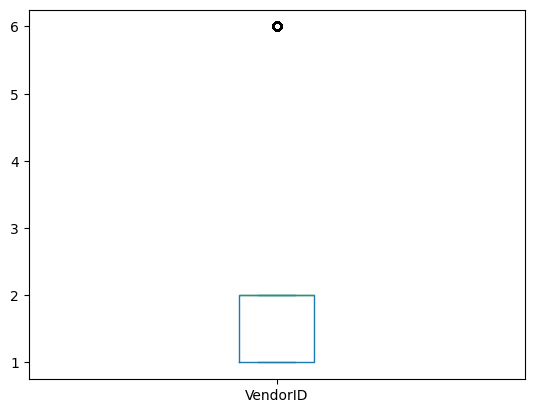

444


In [29]:

Q1 = newdf['VendorID'].quantile(0.25)
Q3 = newdf['VendorID'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['VendorID'] < lower_bound) | (newdf['VendorID'] > upper_bound)]
newdf['VendorID'].plot(kind='box', vert=True)
plt.show()
print(len(outliers))

454302


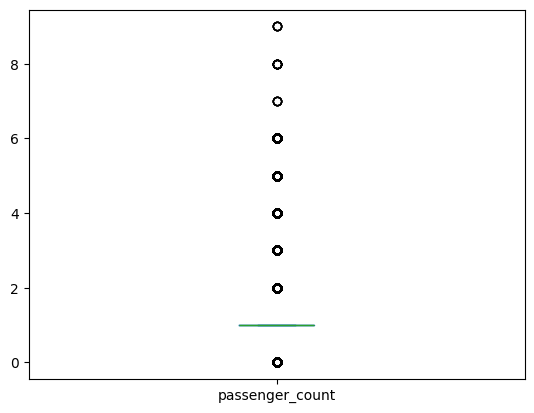

In [30]:

Q1 = newdf['passenger_count'].quantile(0.25)
Q3 = newdf['passenger_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['passenger_count'] < lower_bound) | (newdf['passenger_count'] > upper_bound)]
newdf['passenger_count'].plot(kind='box', vert=True)
print(len(outliers))
plt.show()


249302


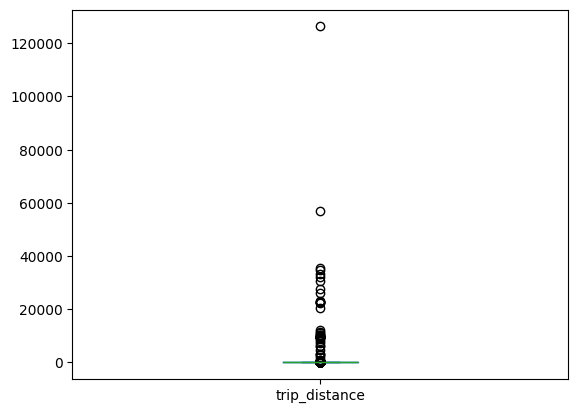

In [31]:

Q1 = newdf['trip_distance'].quantile(0.25)
Q3 = newdf['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['trip_distance'] < lower_bound) | (newdf['trip_distance'] > upper_bound)]
newdf['trip_distance'].plot(kind='box', vert=True)
print(len(outliers))
plt.show()

102267


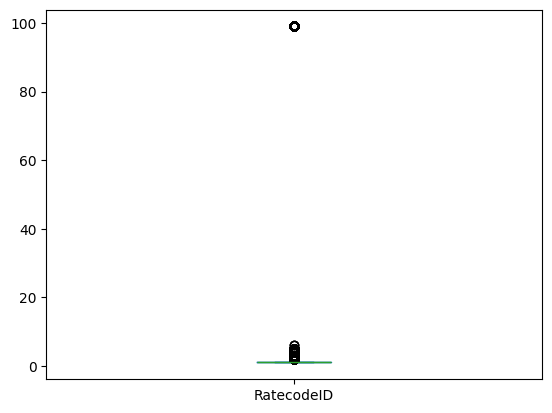

In [32]:
Q1 = newdf['RatecodeID'].quantile(0.25)
Q3 = newdf['RatecodeID'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['RatecodeID'] < lower_bound) | (newdf['RatecodeID'] > upper_bound)]
newdf['RatecodeID'].plot(kind='box', vert=True)
print(len(outliers))
plt.show()

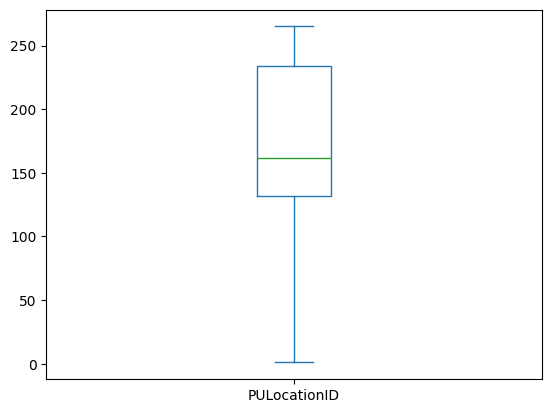

In [33]:
Q1 = newdf['PULocationID'].quantile(0.25)
Q3 = newdf['PULocationID'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['PULocationID'] < lower_bound) | (newdf['PULocationID'] > upper_bound)]
newdf['PULocationID'].plot(kind='box', vert=True)
plt.show()

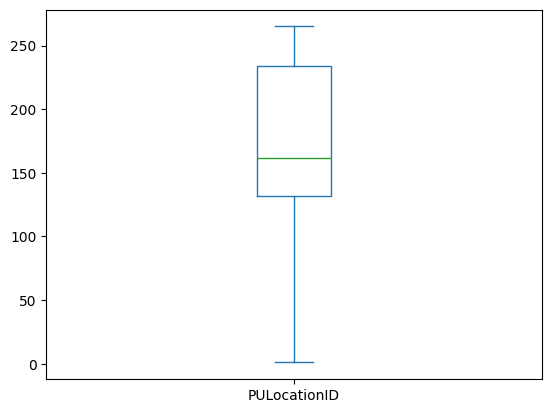

In [34]:
Q1 = newdf['DOLocationID'].quantile(0.25)
Q3 = newdf['DOLocationID'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['PULocationID'] < lower_bound) | (newdf['PULocationID'] > upper_bound)]
newdf['PULocationID'].plot(kind='box', vert=True)
plt.show()

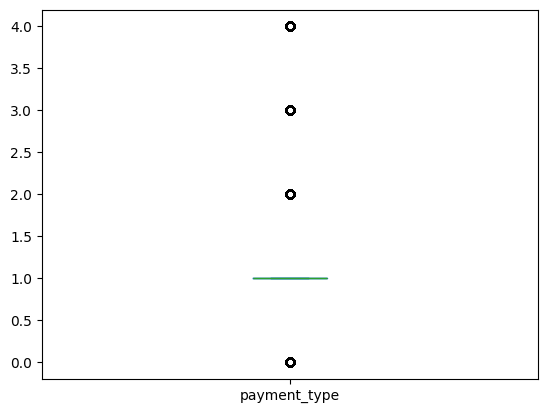

In [35]:
Q1 = newdf['payment_type'].quantile(0.25)
Q3 = newdf['payment_type'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['payment_type'] < lower_bound) | (newdf['payment_type'] > upper_bound)]
newdf['payment_type'].plot(kind='box', vert=True)

plt.show()

197413


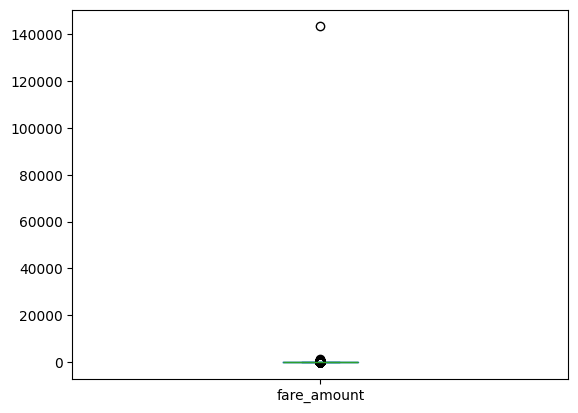

In [36]:
Q1 = newdf['fare_amount'].quantile(0.25)
Q3 = newdf['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['fare_amount'] < lower_bound) | (newdf['fare_amount'] > upper_bound)]
newdf['fare_amount'].plot(kind='box', vert=True)
print(len(outliers))

plt.show()

34047


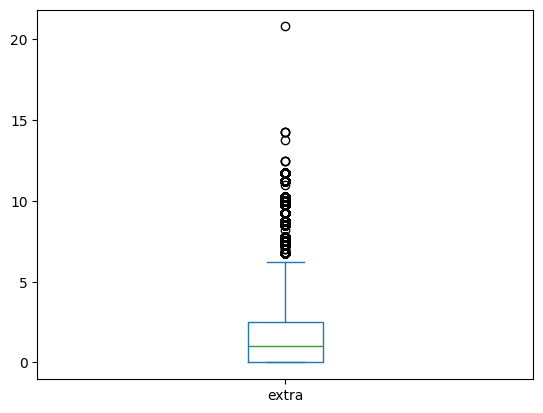

In [37]:
Q1 = newdf['extra'].quantile(0.25)
Q3 = newdf['extra'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['extra'] < lower_bound) | (newdf['extra'] > upper_bound)]
newdf['extra'].plot(kind='box', vert=True)
print(len(outliers))
plt.show()

17944


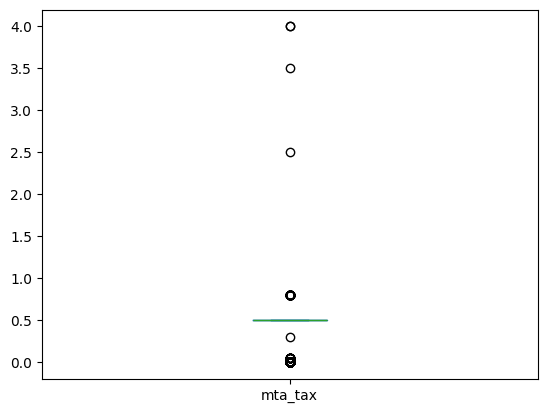

In [38]:
Q1 = newdf['mta_tax'].quantile(0.25)
Q3 = newdf['mta_tax'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['mta_tax'] < lower_bound) | (newdf['mta_tax'] > upper_bound)]
newdf['mta_tax'].plot(kind='box', vert=True)
print(len(outliers))
plt.show()

145673


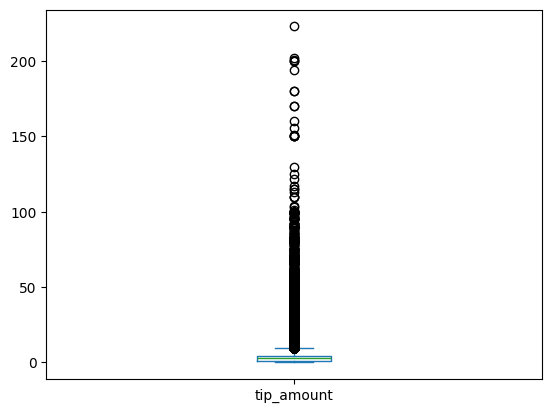

In [39]:
Q1 = newdf['tip_amount'].quantile(0.25)
Q3 = newdf['tip_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['tip_amount'] < lower_bound) | (newdf['tip_amount'] > upper_bound)]
newdf['tip_amount'].plot(kind='box', vert=True)
print(len(outliers))
plt.show()

153802


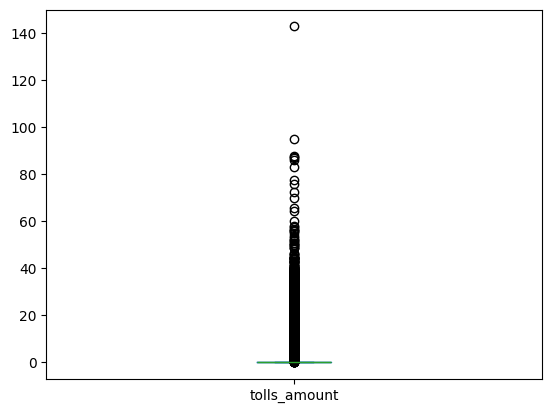

In [40]:
Q1 = newdf['tolls_amount'].quantile(0.25)
Q3 = newdf['tolls_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['tolls_amount'] < lower_bound) | (newdf['tolls_amount'] > upper_bound)]
newdf['tolls_amount'].plot(kind='box', vert=True)
print(len(outliers))
plt.show()

2259


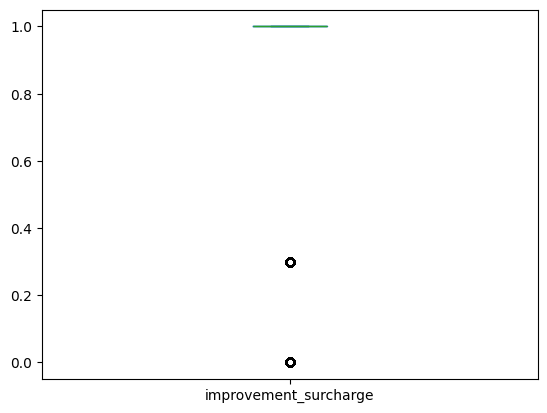

In [41]:
Q1 = newdf['improvement_surcharge'].quantile(0.25)
Q3 = newdf['improvement_surcharge'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['improvement_surcharge'] < lower_bound) | (newdf['improvement_surcharge'] > upper_bound)]
newdf['improvement_surcharge'].plot(kind='box', vert=True)
print(len(outliers))
plt.show()

218083


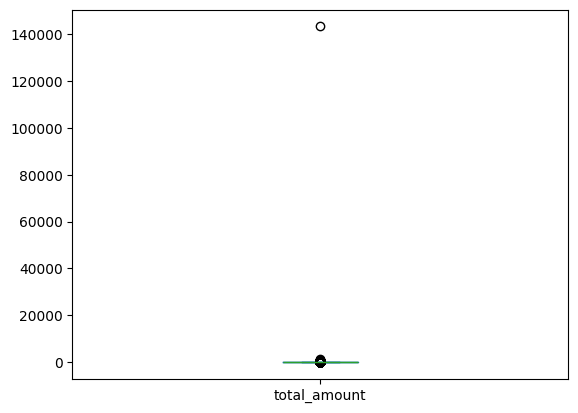

In [42]:
Q1 = newdf['total_amount'].quantile(0.25)
Q3 = newdf['total_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['total_amount'] < lower_bound) | (newdf['total_amount'] > upper_bound)]
newdf['total_amount'].plot(kind='box', vert=True)
print(len(outliers))
plt.show()

205828


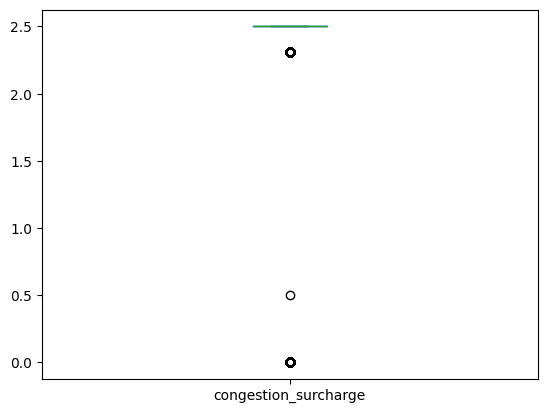

In [43]:
Q1 = newdf['congestion_surcharge'].quantile(0.25)
Q3 = newdf['congestion_surcharge'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['congestion_surcharge'] < lower_bound) | (newdf['congestion_surcharge'] > upper_bound)]
newdf['congestion_surcharge'].plot(kind='box', vert=True)
print(len(outliers))
plt.show()

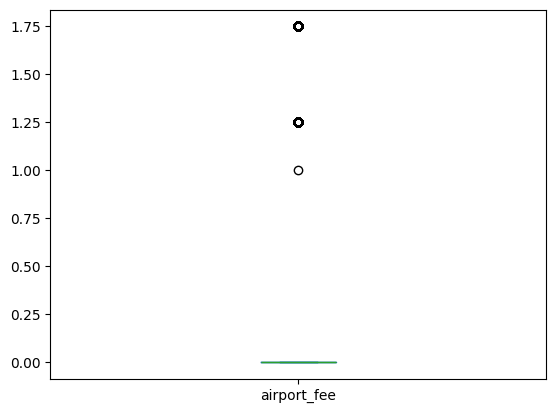

In [44]:
Q1 = newdf['airport_fee'].quantile(0.25)
Q3 = newdf['airport_fee'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = newdf[(newdf['airport_fee'] < lower_bound) | (newdf['airport_fee'] > upper_bound)]
newdf['airport_fee'].plot(kind='box', vert=True)
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [45]:
# remove passenger_count > 6
newdf = newdf[newdf['passenger_count'] <=6]

In [46]:
# Continue with outlier handling
trip_fare = newdf[(newdf['trip_distance']<1) & (newdf['fare_amount']>300)]
print(len(trip_fare))
trip_fare_pick_drop=newdf[(newdf['trip_distance'] == 0) & (newdf['PULocationID'] != newdf['DOLocationID'])]
print(len(trip_fare_pick_drop))
trip_250=newdf[(newdf['trip_distance'] > 250)]
print(len(trip_250))
paymenttype_0=newdf[(newdf['payment_type'] > 250)]
print(len(paymenttype_0))

38
21812
46
0


In [48]:
# Do any columns need standardising?
#trip_distance  and total_amount columns need standardising


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [49]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Date',
 'Hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`:Categorical
* `tpep_dropoff_datetime`:Categorical
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Categorical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`:numerical
* `extra`: numerical
* `mta_tax`: numerical
* `tip_amount`: numerical
* `tolls_amount`: numerical
* `improvement_surcharge`: numerical
* `total_amount`: numerical
* `congestion_surcharge`: numerical
* `airport_fee`: numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

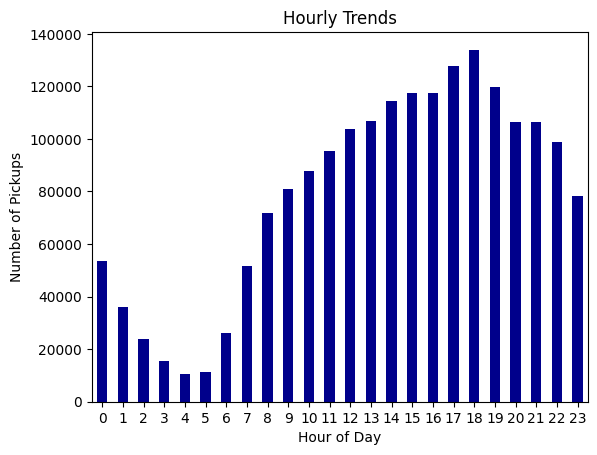

In [50]:
# Find and show the hourly trends in taxi pickups

newdf['tpep_pickup_datetime'] = pd.to_datetime(newdf['tpep_pickup_datetime'])
        
# Extract the day and hour from the DateTime column
newdf['Day'] = newdf['tpep_pickup_datetime'].dt.dayofweek
newdf['Hour'] = newdf['tpep_pickup_datetime'].dt.hour
newdf['Month']=newdf['tpep_pickup_datetime'].dt.month
       
# Group by day, month, hour
day_group = newdf.groupby('Day')
hour_group = newdf.groupby('Hour')
month_group = newdf.groupby('Month')

hourly_trend=hour_group.size()
hourly_trend.plot(kind='bar', color='darkblue')
plt.title('Hourly Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.show()


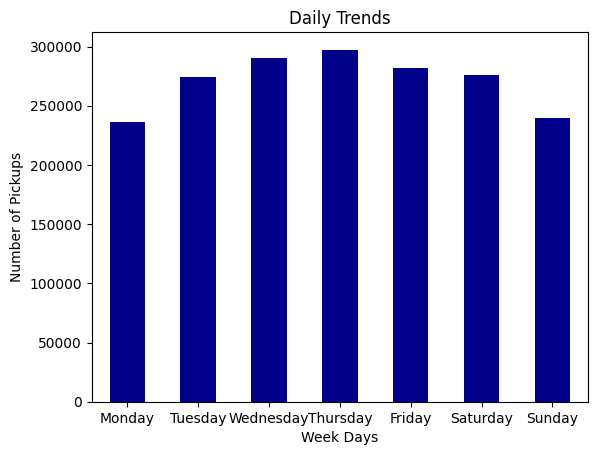

In [51]:
# Find and show the daily trends in taxi pickups (days of the week)
daily_trend=day_group.size()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trend=daily_trend.reindex(range(7))
daily_trend.index=days_of_week
daily_trend.plot(kind='bar', color='darkblue')
plt.title('Daily Trends')
plt.xlabel('Week Days')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.show()



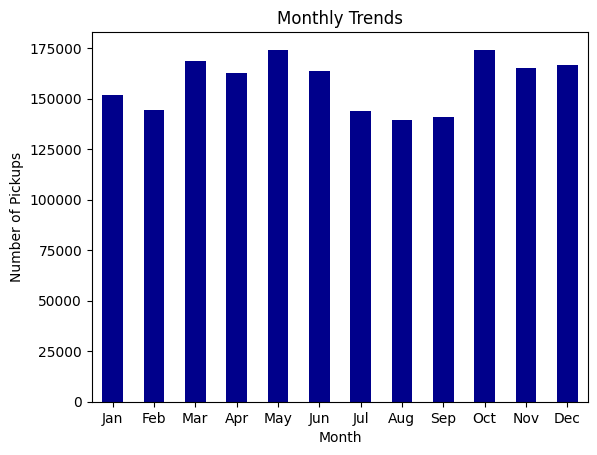

In [52]:
# Show the monthly trends in pickups

monthly_trend=month_group.size()
months_of_year=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_trend.index=months_of_year
monthly_trend.plot(kind='bar', color='darkblue')
plt.title('Monthly Trends')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [53]:
# Analyse the above parameters
print(" Number of records having zero or negative fare amount ",len(newdf[newdf['fare_amount'] <= 0]))
print(" Number of records having zero or negative tip amount ",len(newdf[newdf['tip_amount'] <= 0]))
print(" Number of records having zero or negative total amount ",len(newdf[newdf['total_amount'] <= 0]))
print(" Number of records having zero or negative trip_distance ",len(newdf[newdf['tip_amount'] <= 0]))

 Number of records having zero or negative fare amount  651
 Number of records having zero or negative tip amount  435951
 Number of records having zero or negative total amount  388
 Number of records having zero or negative trip_distance  435951


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [54]:
# Create a df with non zero entries for the selected parameters.
non_zero_df=newdf
non_zero_df = non_zero_df[(non_zero_df['fare_amount'] > 0) & (non_zero_df['tip_amount'] >= 0) & (non_zero_df['total_amount'] > 0)]
non_zero_df = non_zero_df[(non_zero_df['trip_distance'] > 0) | (non_zero_df['PULocationID'] != non_zero_df['DOLocationID'])]


non_zero_df.describe()


VendorID           tpep_pickup_datetime  passenger_count  \
count  1.880080e+06                        1880080     1.880080e+06   
mean   1.733507e+00  2023-07-02 19:07:51.894296064     1.356867e+00   
min    1.000000e+00            2022-12-31 23:51:30     0.000000e+00   
25%    1.000000e+00  2023-04-02 15:31:48.750000128     1.000000e+00   
50%    2.000000e+00     2023-06-27 14:22:32.500000     1.000000e+00   
75%    2.000000e+00  2023-10-06 19:40:20.750000128     1.000000e+00   
max    6.000000e+00            2023-12-31 23:57:51     6.000000e+00   
std    4.474346e-01                            NaN     8.796861e-01   

       trip_distance    RatecodeID  PULocationID  DOLocationID  payment_type  \
count   1.880080e+06  1.880080e+06  1.880080e+06  1.880080e+06  1.880080e+06   
mean    3.890699e+00  1.599799e+00  1.652539e+02  1.640100e+02  1.158591e+00   
min     0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%     1.070000e+00  1.000000e+00  1.320000e+02  1.130000e+02  1.000000e+00   
50%     1.800000e+00  1.000000e+00  1.620000e+02  1.620000e+02  1.000000e+00   
75%     3.430000e+00  1.000000e+00  2.340000e+02  2.340000e+02  1.000000e+00   
max     1.263605e+05  9.900000e+01  2.650000e+02  2.650000e+02  4.000000e+00   
std     1.299684e+02  7.251071e+00  6.395487e+01  6.980574e+01  4.987837e-01   

        fare_amount         extra  ...    tip_amount  tolls_amount  \
count  1.880080e+06  1.880080e+06  ...  1.880080e+06  1.880080e+06   
mean   1.984078e+01  1.595078e+00  ...  3.547646e+00  5.971714e-01   
min    1.000000e-02  0.000000e+00  ...  0.000000e+00  0.000000e+00   
25%    9.300000e+00  0.000000e+00  ...  1.000000e+00  0.000000e+00   
50%    1.350000e+01  1.000000e+00  ...  2.860000e+00  0.000000e+00   
75%    2.190000e+01  2.500000e+00  ...  4.440000e+00  0.000000e+00   
max    1.431635e+05  2.080000e+01  ...  2.230800e+02  9.500000e+01   
std    1.059125e+02  1.830485e+00  ...  3.991547e+00  2.177975e+00   

       improvement_surcharge  total_amount  congestion_surcharge  \
count           1.880080e+06  1.880080e+06          1.880080e+06   
mean            9.992689e-01  2.892072e+01          2.318467e+00   
min             0.000000e+00  1.010000e+00          0.000000e+00   
25%             1.000000e+00  1.600000e+01          2.500000e+00   
50%             1.000000e+00  2.100000e+01          2.500000e+00   
75%             1.000000e+00  3.080000e+01          2.500000e+00   
max             1.000000e+00  1.431675e+05          2.500000e+00   
std             2.427457e-02  1.067820e+02          6.369496e-01   

        airport_fee          Hour   Airport_fee           Day         Month  
count  1.880080e+06  1.880080e+06  1.880080e+06  1.880080e+06  1.880080e+06  
mean   1.376404e-01  1.427344e+01  1.291182e-01  3.002709e+00  6.539033e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
25%    0.000000e+00  1.100000e+01  0.000000e+00  1.000000e+00  4.000000e+00  
50%    0.000000e+00  1.500000e+01  0.000000e+00  3.000000e+00  6.000000e+00  
75%    0.000000e+00  1.900000e+01  0.000000e+00  5.000000e+00  1.000000e+01  
max    1.750000e+00  2.300000e+01  1.750000e+00  6.000000e+00  1.200000e+01  
std    4.569793e-01  5.804125e+00  4.477171e-01  1.928683e+00  3.467175e+00  

[8 rows x 21 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

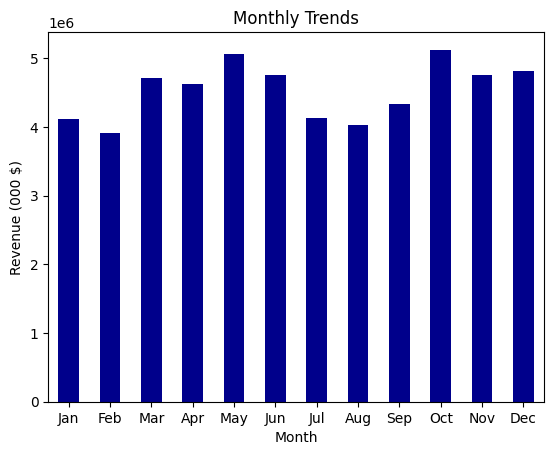

In [55]:
# Group data by month and analyse monthly revenue


montly_revenu_trend=non_zero_df.groupby('Month')['total_amount'].sum()
montly_revenu_trend.index=months_of_year
montly_revenu_trend.plot(kind='bar', color='darkblue')

plt.title('Monthly Trends')
plt.xlabel('Month')
plt.ylabel('Revenue (000 $)')
plt.xticks(rotation=0)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [56]:
# Calculate proportion of each quarter

non_zero_df['quarter'] = non_zero_df['tpep_pickup_datetime'].dt.to_period('Q')

revenu_per_quarter = non_zero_df.groupby('quarter').aggregate({'total_amount':['sum']})

total_revenue = revenu_per_quarter['total_amount'].sum()

revenu_per_quarter['proportion'] = revenu_per_quarter['total_amount'] / total_revenue

revenu_per_quarter.head()


total_amount    proportion
                 sum              
quarter                           
2022Q4         13.50  2.482838e-07
2023Q1   12738554.64  2.342797e-01
2023Q2   14448774.61  2.657331e-01
2023Q3   12496020.72  2.298192e-01
2023Q4   14689903.15  2.701678e-01

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

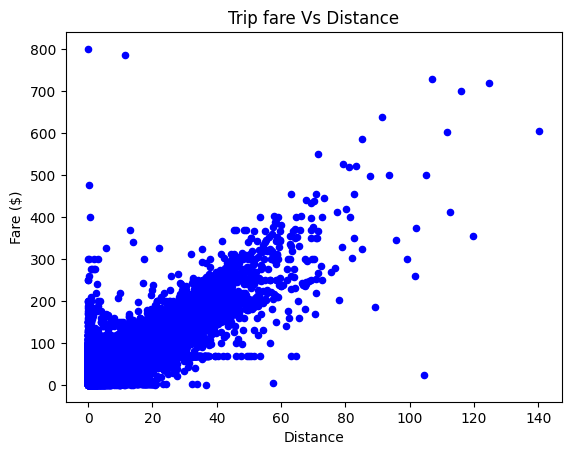

In [57]:
# Show how trip fare is affected by distance
distance_vs_fare = non_zero_df[(non_zero_df['trip_distance'] > 0) & (non_zero_df['trip_distance'] < 150) & (non_zero_df['fare_amount']<1000)] 

distance_vs_fare.plot(kind='scatter', x='trip_distance', y='fare_amount', color='blue', marker='o')
plt.title('Trip fare Vs Distance')
plt.xlabel('Distance')
plt.ylabel('Fare ($)')
plt.xticks(rotation=0)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

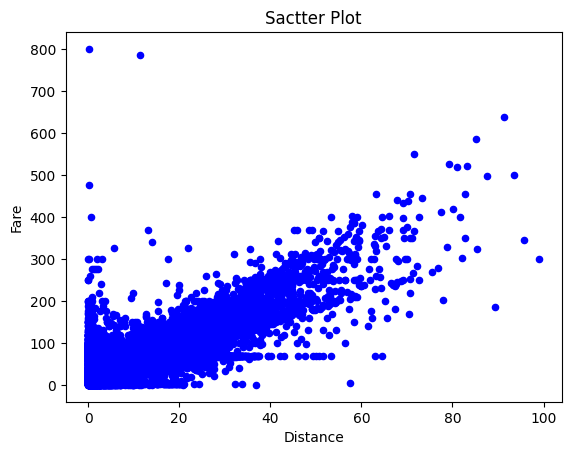

In [58]:
# Show relationship between fare and trip duration

distance_vs_fare = non_zero_df[(non_zero_df['trip_distance'] > 0) & (non_zero_df['trip_distance'] < 100) & (non_zero_df['fare_amount'] < 1000)] 

distance_vs_fare.plot(kind='scatter', x='trip_distance', y='fare_amount', color='blue', marker='o')
plt.title('Sactter Plot')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.xticks(rotation=0)
plt.show()

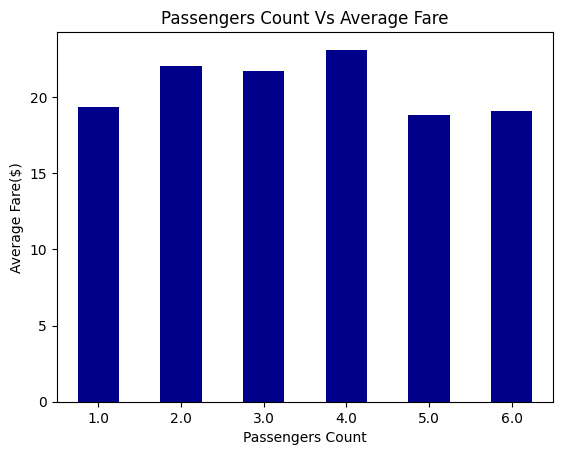

In [59]:
# Show relationship between fare and number of passengers
non_zero_df=non_zero_df[non_zero_df['passenger_count'] >0]
fare_passengers_trend=non_zero_df.groupby('passenger_count')['fare_amount'].mean()
fare_passengers_trend.plot(kind='bar', color='darkblue')
plt.title('Passengers Count Vs Average Fare')
plt.xlabel('Passengers Count')
plt.ylabel('Average Fare($)')
plt.xticks(rotation=0)
plt.show()



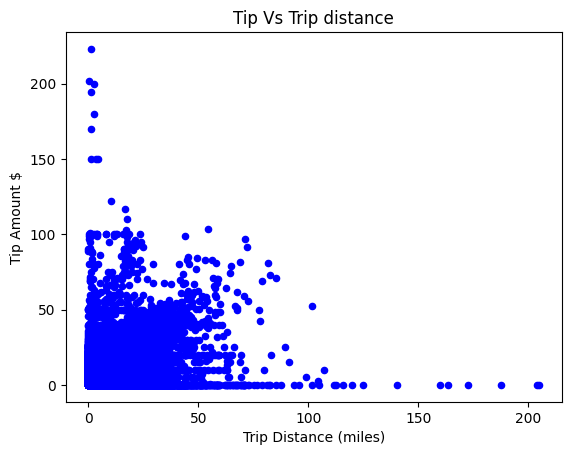

Coorelation between Tip and Trip   0.02250796884490598


In [60]:
# Show relationship between tip and trip distance

tip_vs_trip =non_zero_df[(non_zero_df['trip_distance']>0) & (non_zero_df['trip_distance']<=250) & (non_zero_df['tip_amount']<1300)]
tip_vs_trip.plot(kind='scatter', x='trip_distance', y='tip_amount', color='Blue', marker='o')
plt.title('Tip Vs Trip distance')
plt.ylabel('Tip Amount $')
plt.xlabel('Trip Distance (miles)')
plt.xticks(rotation=0)
plt.show()
corr_tip_trip=non_zero_df['trip_distance'].corr(non_zero_df['tip_amount'])
print ("Coorelation between Tip and Trip  ", corr_tip_trip)

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<Axes: ylabel='Frequency'>

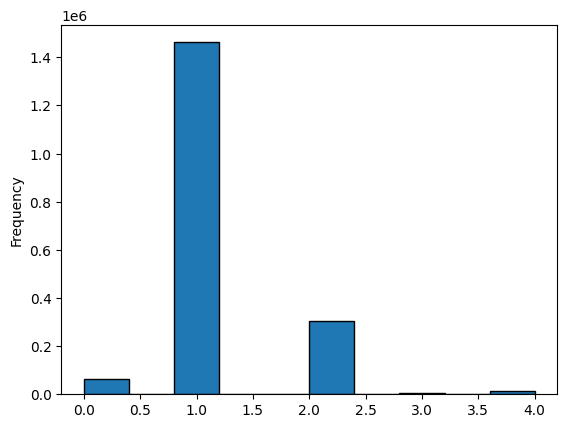

In [61]:
# Analyse the distribution of different payment types (payment_type).

non_zero_df['payment_type'].plot(kind='hist', bins=10, edgecolor='black', alpha=1)


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [62]:
 !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [63]:
import geopandas as gpd

os.chdir('C:/Users/Shitanshu Shrivastav/EDA/Datasets_and_Dictionary_NYC/taxi_zones')

path = os.path.join(os.getcwd(), 'taxi_zones.shp')
zones = gpd.read_file(path)
zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<Axes: >

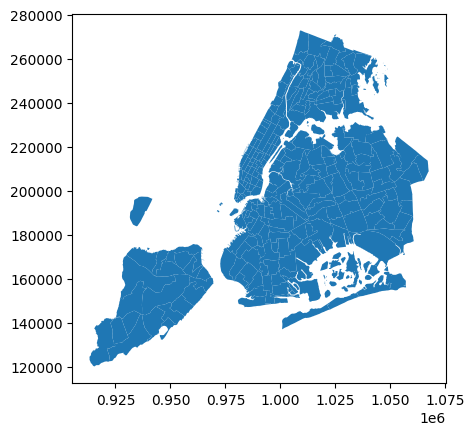

In [64]:

zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [75]:
# Merge zones and trip records using locationID and PULocationID

non_zero_df = pd.merge(non_zero_df, zones, left_on='PULocationID', right_on='LocationID', how='left')
non_zero_df.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           0.86         1.0           141           140             1   
1           7.74         1.0           138           256             2   
2           1.24         1.0           161           237             1   
3           1.44         1.0           237           141             2   
4           0.54         1.0           143           142             2   

   fare_amount  ...  Day  Month  quarter  OBJECTID  Shape_Leng  Shape_Area  \
0          6.5  ...    5     12   2022Q4     141.0    0.041514    0.000077   
1         32.4  ...    6      1   2023Q1     138.0    0.107467    0.000537   
2          7.9  ...    6      1   2023Q1     161.0    0.035804    0.000072   
3         11.4  ...    6      1   2023Q1     237.0    0.042213    0.000096   
4          6.5  ...    6      1   2023Q1     143.0    0.054180    0.000151   

                    zone  LocationID    borough  \
0        Lenox Hill West       141.0  Manhattan   
1      LaGuardia Airport       138.0     Queens   
2         Midtown Center       161.0  Manhattan   
3  Upper East Side South       237.0  Manhattan   
4    Lincoln Square West       143.0  Manhattan   

                                            geometry  
0  POLYGON ((994839.073 216123.698, 994786.74 216...  
1  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
2  POLYGON ((991081.026 214453.698, 990952.644 21...  
3  POLYGON ((993633.442 216961.016, 993507.232 21...  
4  POLYGON ((989338.1 223572.253, 989368.225 2235...  

[5 rows x 31 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [76]:
# Group data by location and calculate the number of trips

trips = non_zero_df.groupby('PULocationID').size().reset_index(name='num_of_trips')

trips.sort_values(by='num_of_trips', inplace=True, ascending=False)
trips.head()


PULocationID  num_of_trips
125           132         94456
229           237         86869
154           161         85852
228           236         78094
155           162         65418

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

<Axes: >

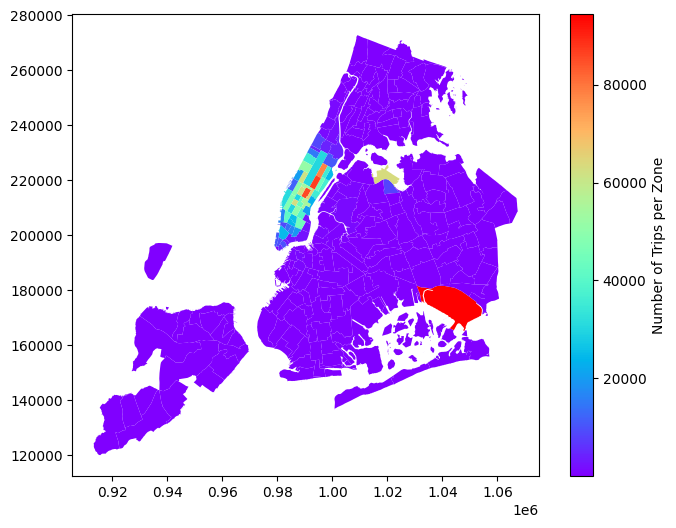

In [77]:
# Merge trip counts back to the zones GeoDataFrame

trip_counts_per_zone = zones.merge(trips, left_on='LocationID', right_on='PULocationID', how='left')
#trip_counts_per_zone.head()
trip_counts_per_zone.plot(column='num_of_trips', cmap='rainbow', legend=True, figsize=(8, 6),legend_kwds={'label': "Number of Trips per Zone"})



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

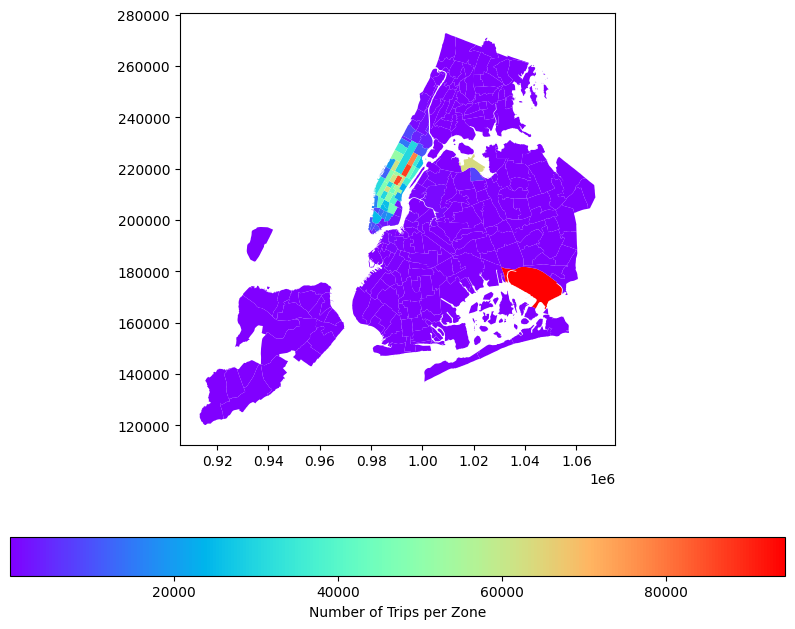

In [78]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the map and display it
trip_counts_per_zone.plot(column='num_of_trips', ax=ax, legend=True, cmap='rainbow', legend_kwds={'label': "Number of Trips per Zone", 'orientation': 'horizontal'})

plt.show()


In [89]:
# can you try displaying the zones DF sorted by the number of trips?
trips = non_zero_df.groupby('zone').size().reset_index(name='num_of_trips')
trips.sort_values(by='num_of_trips', ascending=False, inplace=True)
trips.head()


zone  num_of_trips
119            JFK Airport         94456
228  Upper East Side South         86869
152         Midtown Center         85852
227  Upper East Side North         78094
153           Midtown East         65418

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [90]:
# Find routes which have the slowest speeds at different times of the day

non_zero_df['tpep_dropoff_datetime'] = pd.to_datetime(non_zero_df['tpep_dropoff_datetime'])
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])
non_zero_df=non_zero_df[non_zero_df['tpep_pickup_datetime'] < non_zero_df['tpep_dropoff_datetime']]
non_zero_df['trip_duration']=non_zero_df['tpep_dropoff_datetime']-non_zero_df['tpep_pickup_datetime']
non_zero_df['trip_duration']=(non_zero_df['trip_duration']).dt.total_seconds()
non_zero_df=non_zero_df[non_zero_df['trip_distance'] >0]
non_zero_df['trip_speed']=non_zero_df['trip_distance']/(non_zero_df['trip_duration']/3600)
average_speed= non_zero_df.groupby(['PULocationID', 'DOLocationID','Hour']).agg({'trip_speed' : 'mean'}).reset_index()
newdfSorted=non_zero_df.sort_values(by='trip_speed', ascending =True)

newdfSorted.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
480658          2  2023-12-01 01:34:11   2023-12-01 13:55:56              1.0   
1516300         2  2023-05-20 15:14:18   2023-05-21 05:49:53              1.0   
1042567         2  2023-08-17 16:50:54   2023-08-18 09:10:12              1.0   
846850          2  2023-06-07 22:03:10   2023-06-08 14:41:32              3.0   
400811          2  2023-11-15 12:57:27   2023-11-16 12:55:17              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
480658            0.02         5.0           230           132             2   
1516300           0.04         2.0           194           194             2   
1042567           0.05         1.0           161           132             2   
846850            0.06         1.0           158           158             2   
400811            0.09         1.0            48            48             1   

         fare_amount  ...  quarter  OBJECTID  Shape_Leng  Shape_Area  \
480658          87.0  ...   2023Q4     230.0    0.031028    0.000056   
1516300         70.0  ...   2023Q2     194.0    0.081794    0.000273   
1042567         39.4  ...   2023Q3     161.0    0.035804    0.000072   
846850           4.4  ...   2023Q2     158.0    0.054810    0.000186   
400811           6.5  ...   2023Q4      48.0    0.043747    0.000094   

                                  zone  LocationID    borough  \
480658       Times Sq/Theatre District       230.0  Manhattan   
1516300                Randalls Island       194.0  Manhattan   
1042567                 Midtown Center       161.0  Manhattan   
846850   Meatpacking/West Village West       158.0  Manhattan   
400811                    Clinton East        48.0  Manhattan   

                                                  geometry trip_duration  \
480658   POLYGON ((988786.877 214532.094, 988650.277 21...       44505.0   
1516300  POLYGON ((1007397.115 229906.118, 1007658.653 ...       52535.0   
1042567  POLYGON ((991081.026 214453.698, 990952.644 21...       58758.0   
846850   POLYGON ((982091.02 209596.704, 982318.344 209...       59902.0   
400811   POLYGON ((986694.313 214463.846, 986568.184 21...       86270.0   

         trip_speed  
480658     0.001618  
1516300    0.002741  
1042567    0.003063  
846850     0.003606  
400811     0.003756  

[5 rows x 33 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

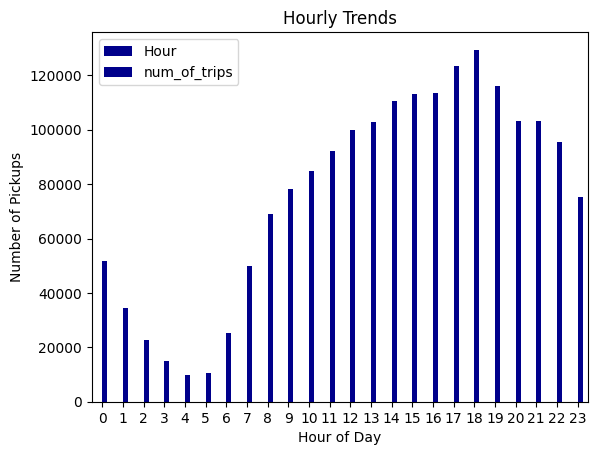

busiest hour  18
Trip count  133938


In [91]:
# Visualise the number of trips per hour and find the busiest hour

hour_group = non_zero_df.groupby('Hour').size().reset_index(name='num_of_trips')

#hourly_trend=hour_group.size()
hour_group.plot(kind='bar', color='darkblue')
plt.title('Hourly Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.show()

print("busiest hour ",hourly_trend.idxmax())
print("Trip count ",hourly_trend.max())


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [92]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.1
scaledup_trips = (non_zero_df.count()) * (1 / sample_fraction)
scaledup_trips.value_counts()


18295020.0    26
18130080.0     7
Name: count, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

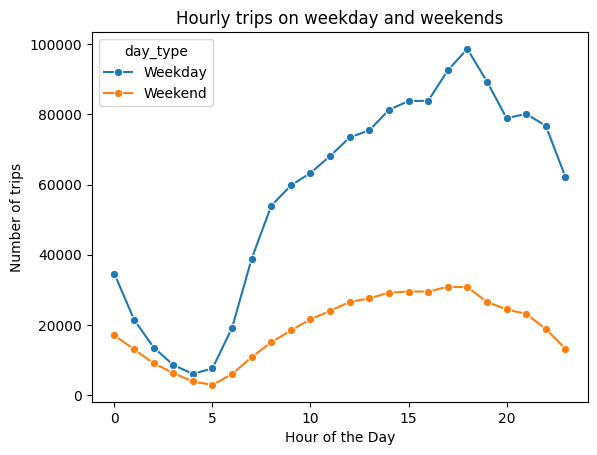

In [94]:
# Compare traffic trends for the week days and weekends

non_zero_df['day_type'] = non_zero_df['Day'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

trafic=non_zero_df.groupby(['day_type','Hour']).size().reset_index(name='num_of_trips')

sns.lineplot(data=trafic, x='Hour', y='num_of_trips', hue='day_type', marker='o')
plt.title('Hourly trips on weekday and weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of trips')
plt.legend(title='day_type')

plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [95]:
# Find top 10 pickup and dropoff zones
pickup_counts = non_zero_df.groupby(['Hour', 'PULocationID']).size().unstack(fill_value=0)
dropoff_counts = non_zero_df.groupby(['Hour', 'DOLocationID']).size().unstack(fill_value=0)
sort_pickup_zones = pickup_counts.sum(axis=0).sort_values(ascending=False)
print("Top 10 pick up zones")
print(sort_pickup_zones[:10])

sort_dropoff_zones = dropoff_counts.sum(axis=0).sort_values(ascending=False)
print("Top 10 drop off zones")
print(sort_dropoff_zones.head(10))




Top 10 pick up zones
PULocationID
132    94187
237    86440
161    85208
236    77529
162    65055
138    63268
186    62544
230    60835
142    60807
170    54283
dtype: int64
Top 10 drop off zones
DOLocationID
236    81302
237    77321
161    71628
230    56164
170    54191
162    52121
142    51526
239    51451
141    48535
68     46412
dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [96]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts_total = pickup_counts.sum(axis=0)  
dropoff_counts_total = dropoff_counts.sum(axis=0)  
pickup_dropoff_ratio = pickup_counts_total / dropoff_counts_total

top_10_ratio = pickup_dropoff_ratio.sort_values(ascending=False).head(10)
top_10_ratio = pd.DataFrame(top_10_ratio).reset_index()
top_10_ratio.columns = ['LocationID', 'Pickup_to_Dropoff_Ratio']
print("Top 10 Pickup and Drop off ratios")
print(top_10_ratio)

bottom_10_ratio = pickup_dropoff_ratio.sort_values(ascending=True).head(10)
bottom_10_ratio = pd.DataFrame(bottom_10_ratio).reset_index()
bottom_10_ratio.columns = ['LocationID', 'Pickup_to_Dropoff_Ratio']

print("Bottom 10 Pickup and Drop off ratios")
print(bottom_10_ratio)

Top 10 Pickup and Drop off ratios
   LocationID  Pickup_to_Dropoff_Ratio
0          70                 9.227376
1         132                 4.521265
2         138                 2.662795
3         186                 1.565439
4         114                 1.380825
5          43                 1.367049
6         249                 1.332426
7         162                 1.248153
8         100                 1.193303
9         161                 1.189591
Bottom 10 Pickup and Drop off ratios
   LocationID  Pickup_to_Dropoff_Ratio
0           1                 0.008872
1          27                 0.027027
2         251                 0.029412
3         245                 0.032258
4         156                 0.038462
5         115                 0.041667
6         257                 0.042471
7         118                 0.048780
8          96                 0.050000
9         111                 0.055556


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [97]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])
non_zero_df['pickup_hour'] = non_zero_df['tpep_pickup_datetime'].dt.hour
night_hours_df = non_zero_df[(non_zero_df['pickup_hour'] >= 23) | (non_zero_df['pickup_hour'] <= 5)]

night_pickup_counts = night_hours_df.groupby('PULocationID').size()  # Count pickups for night hours
night_dropoff_counts = night_hours_df.groupby('DOLocationID').size()  # Count dropoffs for night hours

top_10_night_pickups = night_pickup_counts.sort_values(ascending=False).head(10)
top_10_night_dropoffs = night_dropoff_counts.sort_values(ascending=False).head(10)

top_10_night_pickups_df = pd.DataFrame(top_10_night_pickups).reset_index()
top_10_night_pickups_df.columns = ['LocationID', 'Night_Pickups']

top_10_night_dropoffs_df = pd.DataFrame(top_10_night_dropoffs).reset_index()
top_10_night_dropoffs_df.columns = ['LocationID', 'Night_Dropoffs']

print("Top 10 Pickup Zones during Night Hours (11PM - 5AM):")
print(top_10_night_pickups_df)

print("\nTop 10 Dropoff Zones during Night Hours (11PM - 5AM):")
print(top_10_night_dropoffs_df)

Top 10 Pickup Zones during Night Hours (11PM - 5AM):
   LocationID  Night_Pickups
0          79          15782
1         132          14217
2         249          12644
3          48          10526
4         148           9830
5         114           8864
6         230           8234
7         186           6920
8         164           6218
9          68           6102

Top 10 Dropoff Zones during Night Hours (11PM - 5AM):
   LocationID  Night_Dropoffs
0          79            8348
1          48            6954
2         170            6251
3          68            5864
4         107            5743
5         141            5381
6         263            5115
7         249            4922
8         230            4642
9         239            4468


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [98]:
non_zero_df.describe()

VendorID           tpep_pickup_datetime  \
count  1.829502e+06                        1829502   
mean   1.751551e+00  2023-07-02 08:01:55.218251776   
min    1.000000e+00            2022-12-31 23:51:30   
25%    2.000000e+00  2023-04-02 07:15:00.249999872   
50%    2.000000e+00            2023-06-26 16:44:55   
75%    2.000000e+00  2023-10-06 11:20:42.249999872   
max    6.000000e+00            2023-12-31 23:57:51   
std    4.367689e-01                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        1829502     1.829502e+06   1.829502e+06   
mean   2023-07-02 08:19:29.259737600     1.381587e+00   3.952728e+00   
min              2022-12-31 23:56:06     1.000000e+00   1.000000e-02   
25%       2023-04-02 07:37:45.500000     1.000000e+00   1.100000e+00   
50%              2023-06-26 17:03:08     1.000000e+00   1.820000e+00   
75%              2023-10-06 11:39:41     1.000000e+00   3.490000e+00   
max              2024-01-01 20:50:55     6.000000e+00   1.263605e+05   
std                              NaN     8.732445e-01   1.317511e+02   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  1.829502e+06  1.829502e+06  1.829502e+06  1.829502e+06  1.829502e+06   
mean   1.561436e+00  1.653120e+02  1.640436e+02  1.165718e+00  1.984862e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  1.000000e-02   
25%    1.000000e+00  1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00   
50%    1.000000e+00  1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01   
75%    1.000000e+00  2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01   
max    9.900000e+01  2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05   
std    6.992377e+00  6.386494e+01  6.977750e+01  4.893503e-01  1.073341e+02   

       ...   Airport_fee           Day         Month      OBJECTID  \
count  ...  1.829502e+06  1.829502e+06  1.829502e+06  1.813008e+06   
mean   ...  1.310892e-01  2.999675e+00  6.523975e+00  1.644143e+02   
min    ...  0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00   
25%    ...  0.000000e+00  1.000000e+00  4.000000e+00  1.320000e+02   
50%    ...  0.000000e+00  3.000000e+00  6.000000e+00  1.610000e+02   
75%    ...  0.000000e+00  5.000000e+00  1.000000e+01  2.330000e+02   
max    ...  1.750000e+00  6.000000e+00  1.200000e+01  2.630000e+02   
std    ...  4.508501e-01  1.928188e+00  3.466352e+00  6.345340e+01   

         Shape_Leng    Shape_Area    LocationID  trip_duration    trip_speed  \
count  1.813008e+06  1.813008e+06  1.813008e+06   1.829502e+06  1.829502e+06   
mean   5.678596e-02  2.197439e-04  1.644143e+02   1.054041e+03  1.403914e+01   
min    1.927050e-02  1.802598e-05  1.000000e+00   1.000000e+00  1.617796e-03   
25%    3.580391e-02  6.576977e-05  1.320000e+02   4.660000e+02  7.200000e+00   
50%    4.221260e-02  9.425384e-05  1.610000e+02   7.650000e+02  9.703504e+00   
75%    5.279311e-02  1.288489e-04  2.330000e+02   1.246000e+03  1.344220e+01   
max    4.334697e-01  4.866340e-03  2.630000e+02   3.313460e+05  9.940188e+05   
std    4.820485e-02  4.397814e-04  6.345350e+01   2.462623e+03  8.493440e+02   

        pickup_hour  
count  1.829502e+06  
mean   1.428386e+01  
min    0.000000e+00  
25%    1.100000e+01  
50%    1.500000e+01  
75%    1.900000e+01  
max    2.300000e+01  
std    5.799627e+00  

[8 rows x 29 columns]

In [99]:
# Filter for night hours (11 PM to 5 AM)

night_df = non_zero_df[(non_zero_df['Hour'] >= 23) | (non_zero_df['Hour'] <= 5)]  
day_df = non_zero_df[(non_zero_df['Hour'] >= 6) & (non_zero_df['Hour'] <= 22)]  

night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()

total_revenue = non_zero_df['total_amount'].sum()

nighttime_share = (night_revenue / total_revenue) * 100
daytime_share = (day_revenue / total_revenue) * 100

print ("Night Time Revenue Share ", nighttime_share ,"%")
print ("Day Time Revenue Share ", daytime_share,"%")

Night Time Revenue Share  12.173138686133207 %
Day Time Revenue Share  87.82686131386684 %


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [100]:
# Analyse the fare per mile per passenger for different passenger counts

non_zero_df['fare_per_mile'] = non_zero_df['fare_amount'] / non_zero_df['trip_distance']

non_zero_df['fare_per_mile_per_passenger'] = non_zero_df['fare_per_mile'] / non_zero_df['passenger_count']
non_zero_df[['passenger_count','fare_per_mile_per_passenger']].groupby('passenger_count').mean()



fare_per_mile_per_passenger
passenger_count                             
1.0                                10.994181
2.0                                 6.430409
3.0                                 3.908214
4.0                                 4.442722
5.0                                 1.709582
6.0                                 1.350827

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [101]:
# Compare the average fare per mile for different days and for different times of the day

fare_per_hour = non_zero_df.groupby('Hour')['fare_per_mile'].mean().reset_index()
fare_per_day = non_zero_df.groupby('Day')['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Hour of the Day: ")
print(fare_per_hour)

print("Average Fare per Mile by Day of the Week: ")
print(fare_per_day)


Average Fare per Mile by Hour of the Day: 
    Hour  fare_per_mile
0      0      10.479628
1      1      11.256782
2      2       9.767182
3      3      10.850711
4      4      13.270104
5      5      13.979634
6      6      10.937101
7      7      10.211913
8      8      10.344679
9      9      10.433697
10    10      13.189852
11    11      10.956690
12    12      12.058535
13    13      11.976750
14    14      11.680793
15    15      12.532884
16    16      13.897659
17    17      12.005200
18    18      11.590068
19    19      11.583600
20    20       9.572051
21    21       9.506295
22    22      10.151488
23    23      10.695054
Average Fare per Mile by Day of the Week: 
   Day  fare_per_mile
0    0      10.955414
1    1      12.114887
2    2      11.071955
3    3      11.261483
4    4      10.932085
5    5      10.893532
6    6      12.604738


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

    VendorID  Hour  fare_per_mile
0          1     0       6.759494
1          1     1       7.044714
2          1     2       6.931934
3          1     3       6.498157
4          1     4       7.559356
..       ...   ...            ...
64         6    19       5.251338
65         6    20       3.828599
66         6    21       3.790070
67         6    22       7.059671
68         6    23       4.208472

[69 rows x 3 columns]


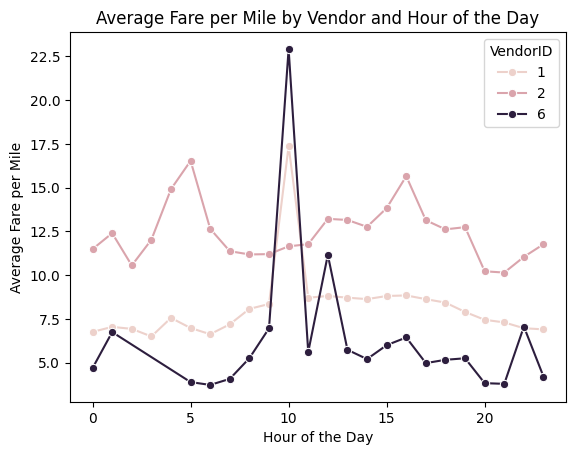

In [102]:
# Compare fare per mile for different vendors
vendor_fare_per_hour=non_zero_df.groupby(['VendorID','Hour'])['fare_per_mile'].mean().reset_index()

print(vendor_fare_per_hour)

sns.lineplot(data=vendor_fare_per_hour, x='Hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.title('Average Fare per Mile by Vendor and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.legend(title='VendorID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


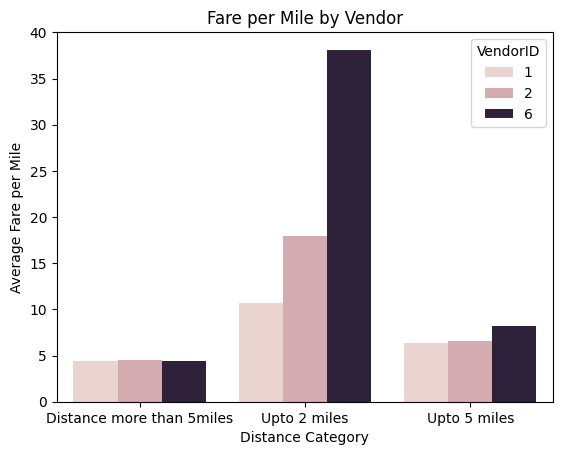

In [103]:
# Defining distance tiers
non_zero_df['distance_category']= non_zero_df['trip_distance'].apply(lambda x: 'Upto 2 miles' if x <= 2 else 'Upto 5 miles' if (x > 2 and x <= 5) else 'Distance more than 5miles')
fare_vendor_distance_category= non_zero_df.groupby(['VendorID','distance_category'])['fare_per_mile'].mean().reset_index()

sns.barplot(data=fare_vendor_distance_category, x='distance_category', y='fare_per_mile', hue='VendorID')
plt.title('Fare per Mile by Vendor')
plt.xlabel('Distance Category')
plt.ylabel('Average Fare per Mile')
plt.legend(title='VendorID')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

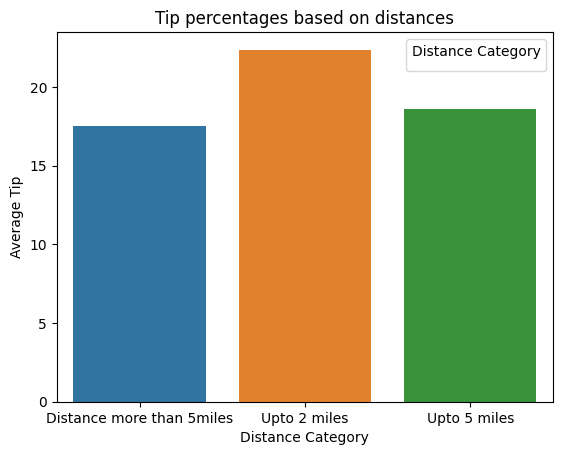

In [104]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
non_zero_df['tip_percentage'] = (non_zero_df['tip_amount'] / non_zero_df['fare_amount']) * 100

tip_per_vs_distance=non_zero_df.groupby('distance_category')['tip_percentage'].mean().reset_index()
sns.barplot(data=tip_per_vs_distance, x='distance_category', y='tip_percentage', hue='distance_category')
plt.title('Tip percentages based on distances')
plt.xlabel('Distance Category')
plt.ylabel('Average Tip')
plt.legend(title='Distance Category')
plt.show()

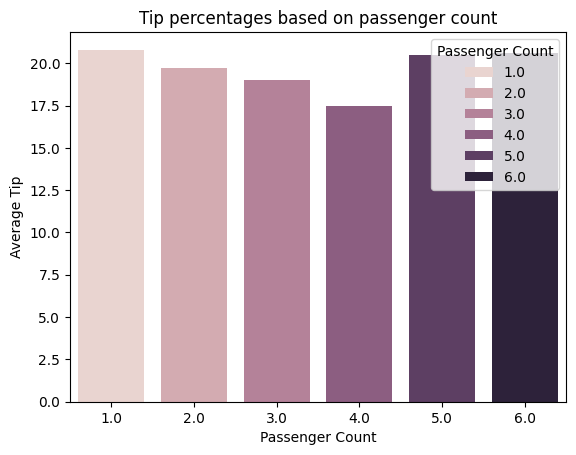

In [105]:
non_zero_df=non_zero_df[non_zero_df['passenger_count']>0]
tip_per_vs_passenger_count=non_zero_df.groupby('passenger_count')['tip_percentage'].mean().reset_index()
sns.barplot(data=tip_per_vs_passenger_count, x='passenger_count', y='tip_percentage', hue='passenger_count')
plt.title('Tip percentages based on passenger count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip')
plt.legend(title='Passenger Count')
plt.show()

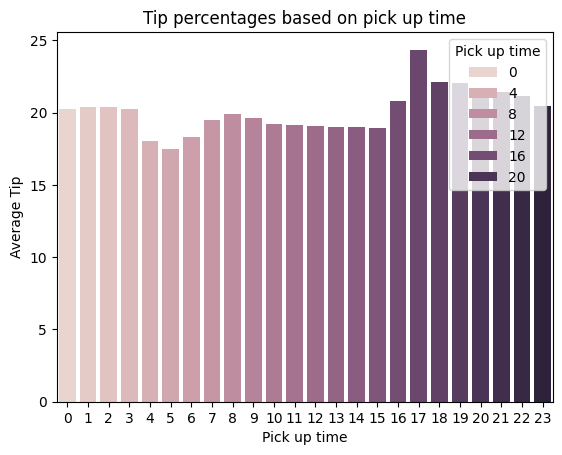

In [106]:

tip_per_vs_pickup_time=non_zero_df.groupby('Hour')['tip_percentage'].mean().reset_index()
sns.barplot(data=tip_per_vs_pickup_time, x='Hour', y='tip_percentage', hue='Hour')
plt.title('Tip percentages based on pick up time')
plt.xlabel('Pick up time')
plt.ylabel('Average Tip')
plt.legend(title='Pick up time')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

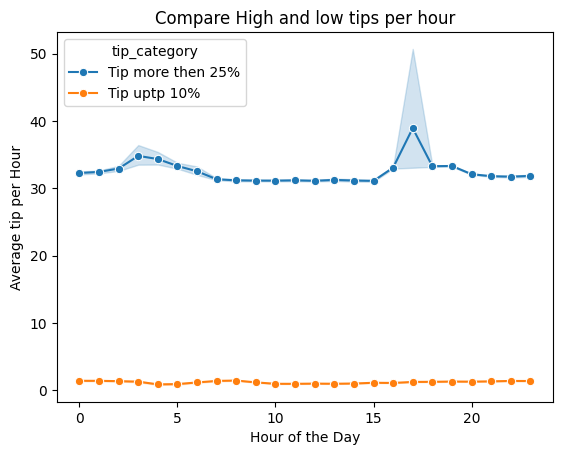

In [107]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

non_zero_df['tip_category']= non_zero_df['tip_percentage'].apply(lambda x: 'Tip uptp 10%' if x <= 10 else 'Tip more then 25%' if (x > 25) else 'Tip between 10 and 25%')
high_low_tip=non_zero_df[(non_zero_df['tip_category'] == 'Tip uptp 10%') | (non_zero_df['tip_category'] == 'Tip more then 25%')]

sns.lineplot(data=high_low_tip, x='Hour', y='tip_percentage', hue='tip_category', marker='o')
plt.title('Compare High and low tips per hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average tip per Hour')
plt.legend(title='tip_category')
plt.show()



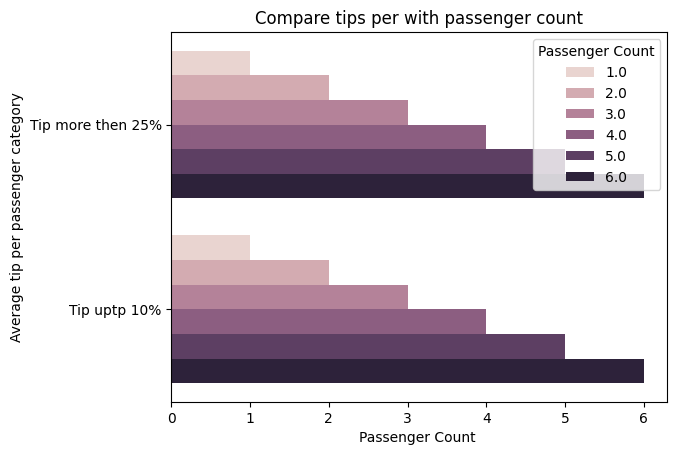

In [127]:
high_low_tip_pass_count=high_low_tip.groupby(['passenger_count','tip_category'])['tip_amount'].mean().reset_index()

sns.barplot(data=high_low_tip_pass_count, x='passenger_count', y='tip_category', hue='passenger_count')
#sns.lineplot(data=high_low_tip, x='passenger_count', y='tip_percentage', hue='tip_category', marker='o')
plt.title('Compare tips per with passenger count')
plt.xlabel('Passenger Count ')
plt.ylabel('Average tip per passenger category')
plt.legend(title='Passenger Count')
plt.show()


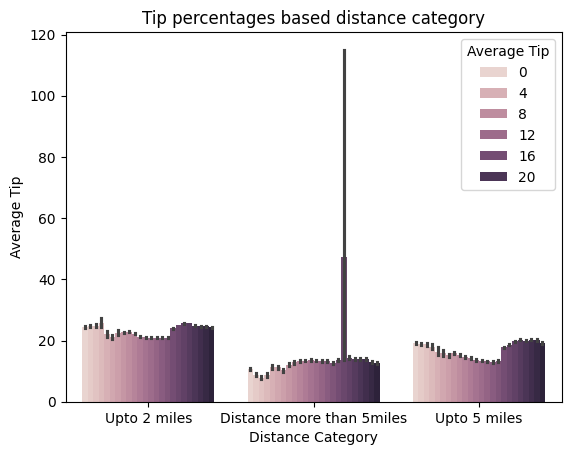

In [109]:

sns.barplot(data=high_low_tip, x='distance_category', y='tip_percentage', hue='Hour')
plt.title('Tip percentages based distance category')
plt.xlabel('Distance Category')
plt.ylabel('Average Tip')
plt.legend(title='Pick up time')
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

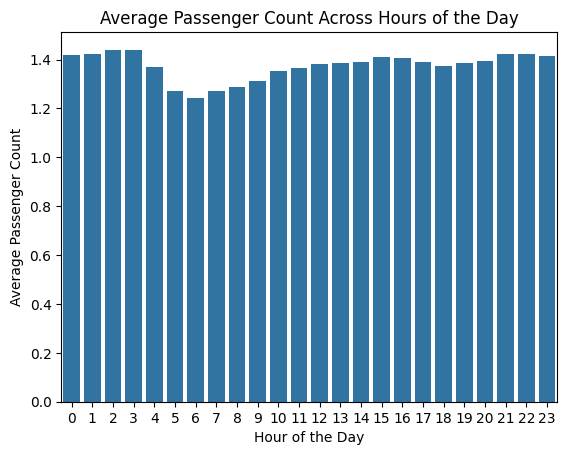

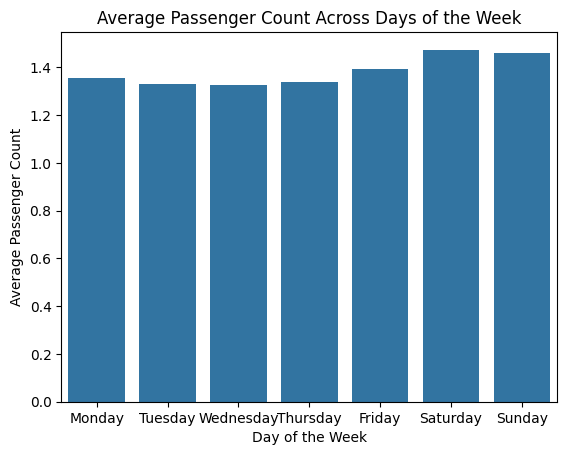

In [110]:
# See how passenger count varies across hours and days


non_zero_df['Day_Of_Week'] = non_zero_df['tpep_pickup_datetime'].dt.day_name()  # Day of the week

hourly_passenger_count = non_zero_df.groupby('Hour')['passenger_count'].mean().reset_index()
daily_passenger_count = non_zero_df.groupby('Day_Of_Week')['passenger_count'].mean().reset_index()

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passenger_count['Day_Of_Week'] = pd.Categorical(daily_passenger_count['Day_Of_Week'], categories=order, ordered=True)
daily_passenger_count = daily_passenger_count.sort_values('Day_Of_Week')


sns.barplot(data=hourly_passenger_count, x='Hour', y='passenger_count')
plt.title('Average Passenger Count Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.show()

sns.barplot(data=daily_passenger_count, x='Day_Of_Week', y='passenger_count')
plt.title('Average Passenger Count Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

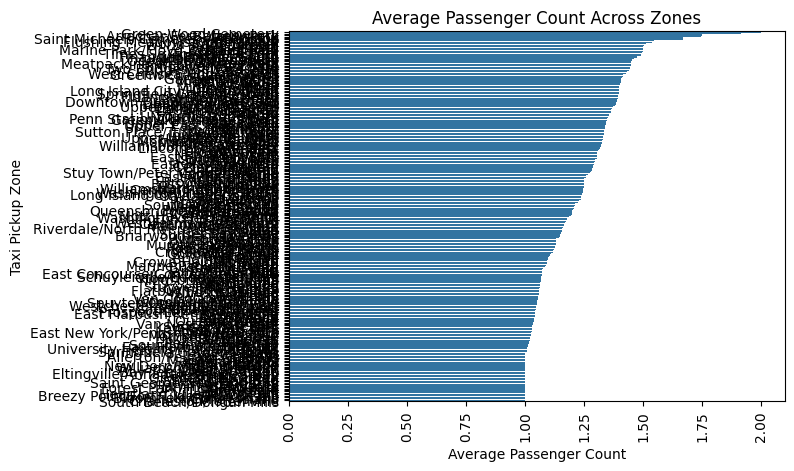

<Figure size 1000x1800 with 0 Axes>

Bussiest Zone 104                 Green-Wood Cemetery
5               Arrochar/Fort Wadsworth
11                         Battery Park
186                            Red Hook
198    Saint Michaels Cemetery/Woodside
Name: zone, dtype: object


In [111]:
# How does passenger count vary across zones
passenger_count_per_zone = non_zero_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
all_zones = pd.merge(passenger_count_per_zone, zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
all_zones_sorted = all_zones.sort_values('passenger_count', ascending=False)

sns.barplot(data=all_zones_sorted, y='zone', x='passenger_count')
plt.title('Average Passenger Count Across Zones')
plt.ylabel('Taxi Pickup Zone')
plt.xlabel('Average Passenger Count')
plt.xticks(rotation=90)
plt.figure(figsize=(10, 18)) 
plt.show()

print('Bussiest Zone', all_zones_sorted['zone'].head())

In [112]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_trips = pd.merge(zones, df.groupby('PULocationID')['passenger_count'].mean().reset_index(),left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips['average_passenger_count'] = zones_with_trips.groupby('LocationID')['passenger_count'].transform('mean')
zones_with_trips[['zone', 'average_passenger_count']].sort_values(by='average_passenger_count',inplace=True)
zones_with_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  passenger_count  average_passenger_count  
0           1.0         1.579439                 1.579439  
1           2.0         1.000000                 1.000000  
2           3.0         1.025000                 1.025000  
3           4.0         1.409457                 1.409457  
4           5.0         1.000000                 1.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

In [113]:
surcharges_applied= ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']
surcharge_details = {}
for surcharge in surcharges_applied:
    non_zero_count = (non_zero_df[surcharge] > 0).sum()
    non_zero_percentage = (non_zero_count / len(non_zero_df)) * 100
    surcharge_details[surcharge]= {
        'Non-zero count': non_zero_count,
        'Prevalence (%)': non_zero_percentage
    }
print(surcharge_details)

surcharegdf=pd.DataFrame(surcharge_details).T

surcharegdf.head()

{'extra': {'Non-zero count': 1103340, 'Prevalence (%)': 60.30821502244873}, 'mta_tax': {'Non-zero count': 1817729, 'Prevalence (%)': 99.35649154797316}, 'improvement_surcharge': {'Non-zero count': 1829450, 'Prevalence (%)': 99.99715769646603}, 'congestion_surcharge': {'Non-zero count': 1703103, 'Prevalence (%)': 93.09107068480931}, 'airport_fee': {'Non-zero count': 157195, 'Prevalence (%)': 8.592228923499402}}


Non-zero count  Prevalence (%)
extra                       1103340.0       60.308215
mta_tax                     1817729.0       99.356492
improvement_surcharge       1829450.0       99.997158
congestion_surcharge        1703103.0       93.091071
airport_fee                  157195.0        8.592229

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [114]:
# How often is each surcharge applied?
pickup_zone_surcharge = non_zero_df.groupby('PULocationID')[surcharge].apply(lambda x: (x > 0).sum())
pickup_zone_surcharge_percentage = (pickup_zone_surcharge / len(df)) * 100
pickup_hour_surcharge = non_zero_df.groupby('Hour')[surcharge].apply(lambda x: (x > 0).sum())
pickup_hour_surcharge_percentage = (pickup_hour_surcharge / len(df)) * 100
dropoff_zone_surcharge = non_zero_df.groupby('DOLocationID')[surcharge].apply(lambda x: (x > 0).sum())
dropoff_zone_surcharge_percentage = (dropoff_zone_surcharge / len(df)) * 100


non_zero_df['pickup_dayofweek'] = non_zero_df['tpep_pickup_datetime'].dt.dayofweek
pickup_day_surcharge = non_zero_df.groupby('pickup_dayofweek')[surcharge].apply(lambda x: (x > 0).sum())
pickup_day_surcharge_percentage = (pickup_day_surcharge / len(non_zero_df)) * 100

print("Pickup Zone Surcharge Prevalence:")
print(pickup_zone_surcharge_percentage)

print("\nDropoff Zone Surcharge Prevalence:")
print(dropoff_zone_surcharge_percentage)

print("\nPickup Hour Surcharge Prevalence:")
print(pickup_hour_surcharge_percentage)

print("\nPickup Day of Week Surcharge Prevalence:")
print(pickup_day_surcharge_percentage)


Pickup Zone Surcharge Prevalence:
PULocationID
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
         ...   
261    0.000105
262    0.000316
263    0.000211
264    0.062856
265    0.000105
Name: airport_fee, Length: 255, dtype: float64

Dropoff Zone Surcharge Prevalence:
DOLocationID
1      0.012919
2      0.000158
3      0.003797
4      0.019985
5      0.000158
         ...   
261    0.057846
262    0.090804
263    0.102774
264    0.033537
265    0.229382
Name: airport_fee, Length: 260, dtype: float64

Pickup Hour Surcharge Prevalence:
Hour
0     0.281586
1     0.107150
2     0.037018
3     0.021145
4     0.017507
5     0.057425
6     0.153501
7     0.195317
8     0.227536
9     0.295718
10    0.349452
11    0.339327
12    0.394748
13    0.446108
14    0.557425
15    0.570027
16    0.577410
17    0.543345
18    0.509175
19    0.526366
20    0.530953
21    0.521936
22    0.512866
23    0.516083
Name: airport_fee, dtype: float64

Pickup Day of Week Surc

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Below are the recommendations to optimize routing and dispatching: 
1. Have extra fleet of taxis available for peak hour 5 PM to 7PM also for 6 AM to 8 AM.
2. Create seprate segment of taxis for travel distance upto 50 miles.
3. Extra fleet must be available to address high volume on Wednesday.
4. Proactively place minimum number of taxis at specific locations like airport , railways, health care centers etc.
5. Based on passenger count during different hours of the day place taxis of specific make according to the capacity (4/5/6 passengers )

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Below are the suggestions on strategically positioning cabs across different zones

1. Rossville/Woodrow, Battery Park, Red Hook and Newark Airport are the bussiest zones. So extra taxis must be postioned for to avoid any delay in pick up.
2. Different pricing for pickup from very busy and less busy zones during peak hours
3. when demand tends to be higher Strategically deploy more taxis around nightlife districts and airports during nighttime (11 PM - 5 AM).
4. Deploy more taxis with higher capacity in zones with average passenger count is high
5. Continously monitor the trafics across zones to suggest route with minimum trafic while transit


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Dynamic pricing for peak hours, pick up from special zones and night time pickup.
2. Identify zones where customer tend give to with higher tip. Provide better services in those zones for enhanced customer satisfaction.
3. During peak hour suggest sharing ride and hike pricing for single passenger ride.
4. Plan routing for 100% occupancy based on trafic trends
5. Discount fares during off-peak hours, raise prices during peak times.
6. Provide coupons or loyality program for frequent traveller. 

